In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('../data/weight-height.csv')

df.plot(kind='scatter', x='Height', y='Weight', color='r', title='Height valuesS')

In [ ]:
plt.plot([55,78], [75, 250],color='r', linewidth=3)

In [ ]:
def line(x, w=0, b=0):
    return w*x+b

In [ ]:
x=np.linspace(55, 80,100)
yhat=line(x, w=0, b=0)

In [ ]:
x

In [ ]:
df.plot(kind='scatter', x='Height', y='Weight', color='b')
plt.plot(x,yhat, color='r', linewidth=3)

# Cost Function

In [ ]:
def mean_squared_error(y_true, y_pred):
    s=(y_true - y_pred)**2
    return s.mean()

In [ ]:
X=df[['Height']].values       ### take only list valuse of df['Heiht']
y_true=df[['Weight']].values

In [ ]:
y_pred=line(X)
mean_squared_error(y_true, y_pred.ravel())  ##  .ravel() use for flatting

In [ ]:

plt.figure(figsize=(10,5))
ax1=plt.subplot(121)   
df.plot(kind='scatter', x='Height', y='Weight', title='True_value', ax=ax1)

bbs=np.array([-100, -50, 0, 50,100,150])
mses=[]
for b in bbs:
    y_pred=line(X, w=2, b=b)
    mse=mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)
    
ax2=plt.subplot(122)   
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b');

# matplotlib.pyplot.subplots(): hat means you can use this single function to create a figure with several subplots 
# with only one line of code. fig, axes = plt.subplots(nrows=2, ncols=3)
# In contrast, matplotlib.pyplot.subplot(): creates only a single subplot axes at a specified grid position. 


# Linear Regression with Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(1, input_shape=(1, )))

In [ ]:
model.summary()

In [ ]:
model.compile(Adam(learning_rate=0.8),'mean_squared_error')

In [ ]:
model.fit(X, y_true, epochs=20)

In [ ]:
y_pred=model.predict(X)

In [ ]:
df.plot(kind='scatter', x='Height', y='Weight', title='True_value',)
plt.plot(X, y_pred, color='r')

In [ ]:
W,B= model.get_weights()

In [ ]:
W

In [ ]:
B

# Evaluating Model Performance

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print("The R2 score is {:0.3f}". format(r2_score(y_true, y_pred)))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y_true, test_size=0.2)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

In [ ]:
W[0,0] =0.0
B[0]= 0.0
model.set_weights((W,B))

In [ ]:
model.fit(X_train, y_train, epochs=20, verbose=0)   # verbose() use for whole model do not give any output 

In [ ]:
y_train_pred= model.predict(X_train).ravel()
y_test_pred= model.predict(X_test).ravel()

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

In [ ]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

# Classification

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<AxesSubplot:xlabel='Time (min)', ylabel='Buy'>

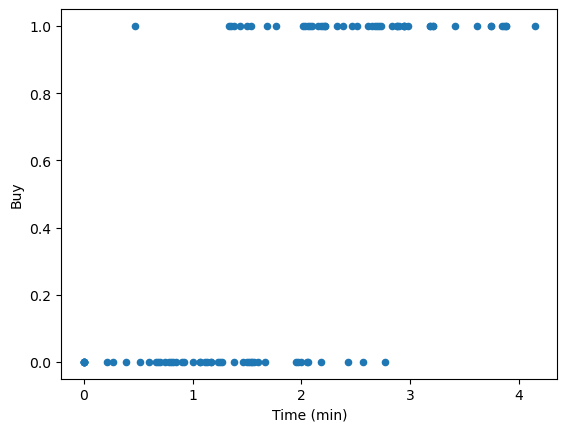

In [59]:
df= pd.read_csv('../data/user_visit_duration.csv')
df.head()
df.plot(kind='scatter', x='Time (min)', y='Buy')

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
4/4 [==============================] - 0s 2ms/step - loss: 0.6209 - accuracy: 0.5700
Epoch 2/25
4/4 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.6500
Epoch 3/25
4/4 [==============================] - 0s 2ms/step - loss: 0.5556 - accuracy: 0.7500
Epoch 4/25
4/4 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.7000
Epoch 5/25
4/4 [==============================] - 0s 2ms/step - loss: 0.5121 - accuracy: 0.7800
Epoch 6/25
4/4 [==============================] - 0s 2ms/step - loss: 0.5074 - accuracy: 0.7800
Epoch 7/25
4/4 [==============================] - 0s 2ms/step - loss: 0.4876 

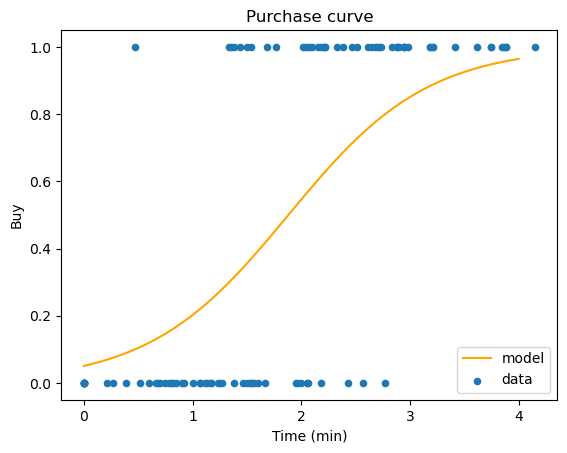

In [60]:
model=Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])
model.summary()
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)
ax=df.plot(kind='scatter', x='Time (min)', y='Buy', title= 'Purchase curve')
temp=np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])



In [61]:
y_pred= model.predict(x)
y_class_pred= y_pred> 0.5

In [62]:
from sklearn.metrics import accuracy_score
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.820


# Train/Test split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:
params= model.get_weights()
params= [np.zeros(w.shape) for w in params ]
model.set_weights(params)
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.463
The test accuracy score is 0.650


# Cross Validation

In [94]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [95]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(learning_rate= 0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model


In [96]:
model= KerasClassifier(build_logistic_regression_model, epochs=25, verbose=0)

In [97]:
from sklearn.model_selection import cross_val_score, KFold

In [98]:
cv = KFold(3, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

In [99]:
scores
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7799 ± 0.0627


# Confusion Matrix

In [105]:
from sklearn.metrics import confusion_matrix

In [111]:
def pretty_confusion_matrix(y_true, y_pred,labels=["False", "True"]):
    cm=confusion_matrix(y_true,y_class_pred)
    pred_labels = ['Pridicted'+ l for l in labels]
    df = pd.DataFrame(cm, index=labels,columns=pred_labels)
    return df

In [112]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,PridictedNot Buy,PridictedBuy
Not Buy,41,9
Buy,9,41


In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [114]:
print("Precision: \t{:0.3}".format(precision_score(y,y_class_pred)))
print("Recall: \t{:0.3}".format(recall_score(y,y_class_pred)))
print("F1 score: \t{:0.3}".format(f1_score(y,y_class_pred)))


Precision: 	0.82
Recall: 	0.82
F1 score: 	0.82


In [116]:
from sklearn.metrics import classification_report

In [117]:
print(classification_report(y,y_class_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        50
           1       0.82      0.82      0.82        50

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



# Feature Preprocession
# Categorical Features

In [119]:
df= pd.read_csv('../data/weight-height.csv')
df.head()

In [120]:
df['Gender'].unique()
pd.get_dummies(df['Gender'], prefix= 'Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


# 1) Rescale with fixed factor

In [121]:
df['Height(feet )']= df['Height']/12.0

In [122]:
df['Weight(100 lbs)'] = df['Weight']/100.0

In [123]:
df.describe()

,Height,Weight,Height(feet ),Weight(100 lbs)
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,66.367560,161.440357,5.530630,1.614404
std,3.847528,32.108439,0.320627,0.321084
min,54.263133,64.700127,4.521928,0.647001
25%,63.505620,135.818051,5.292135,1.358181
50%,66.318070,161.212928,5.526506,1.612129
75%,69.174262,187.169525,5.764522,1.871695
max,78.998742,269.989699,6.583229,2.699897


# MinMax normalization

In [133]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height(feet ),Weight(100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


# 3) Standard normalization

In [136]:
from sklearn.preprocessing import StandardScaler

In [138]:
ss= StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height(feet ),Weight(100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


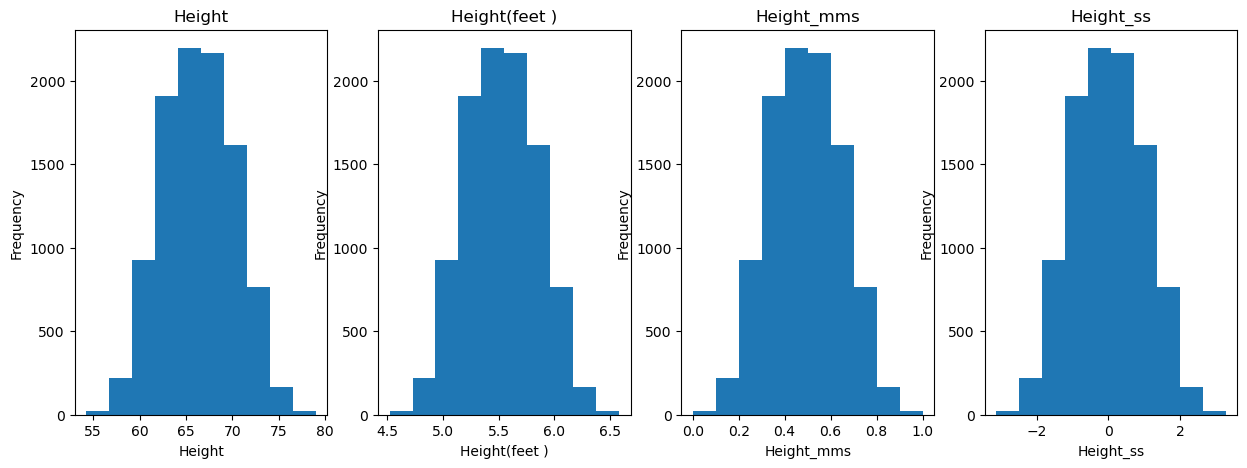

In [145]:
plt.figure(figsize=(15,5))
for i, feature in enumerate(['Height', 'Height(feet )', 'Height_mms', 'Height_ss']):
    plt.subplot(1,4,i+1)
    df[feature].plot(kind='hist', title= feature)
    plt.xlabel(feature)

# Exercise 1

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('../data/housing-data.csv')
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [8]:
df.columns

Index(['sqft', 'bdrms', 'age', 'price'], dtype='object')

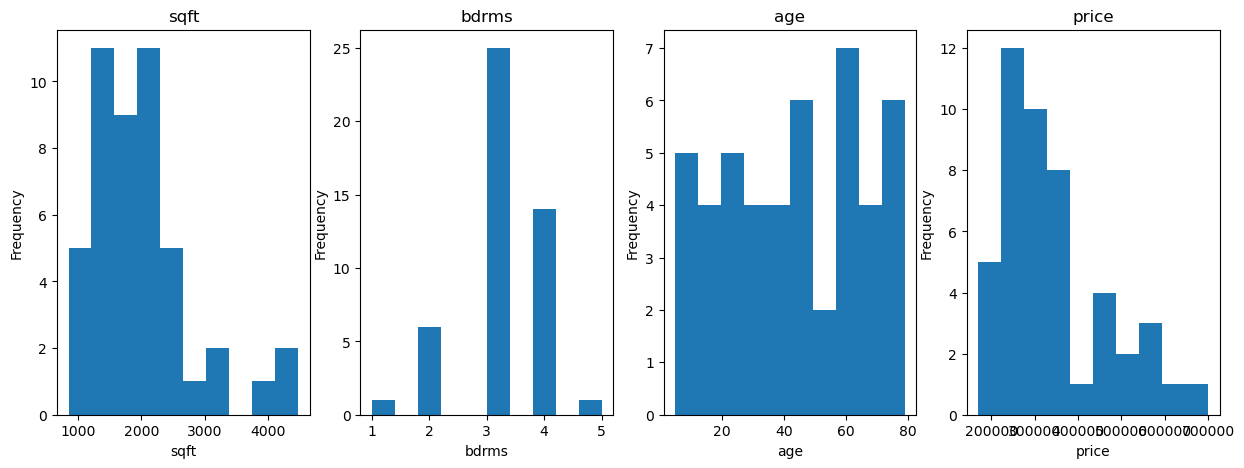

In [41]:
plt.figure(figsize=(15,5))
for i,feature in enumerate(df.columns):
    plt.subplot(1,4,i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)
   
    

In [109]:
x=df[['sqft', 'bdrms', 'age']].values
y=df[['price']].values

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('../data/housing-data.csv')

X = df[['sqft', 'bdrms', 'age']].values
y = df['price'].values

model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')


In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [141]:
len(X_train)

37

In [142]:
len(X)

47

In [158]:
model.fit(X_train, y_train, epochs=10)


Epoch 1/10
2/2 [==============================] - 0s 2ms/step - loss: 133933432832.0000
Epoch 2/10
2/2 [==============================] - 0s 3ms/step - loss: 131548364800.0000
Epoch 3/10
2/2 [==============================] - 0s 3ms/step - loss: 129126604800.0000
Epoch 4/10
2/2 [==============================] - 0s 5ms/step - loss: 126635532288.0000
Epoch 5/10
2/2 [==============================] - 0s 4ms/step - loss: 124332630016.0000
Epoch 6/10
2/2 [==============================] - 0s 4ms/step - loss: 121838895104.0000
Epoch 7/10
2/2 [==============================] - 0s 2ms/step - loss: 119598850048.0000
Epoch 8/10
2/2 [==============================] - 0s 4ms/step - loss: 117340438528.0000
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 115061342208.0000
Epoch 10/10
2/2 [==============================] - 0s 4ms/step - loss: 112900243456.0000


In [157]:
from sklearn.metrics import r2_score
y_train_pred= model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	-6.294
The R2 score on the Test set is:	-38.099


In [164]:
df['sqft1000']=df['sqft']/1000
df['age10'] = df['age']/10
df['price100k'] = df['price']/1e5

In [166]:
X= df[['sqft1000', 'bdrms','age10']].values
y= df['price100k'].values

In [168]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=20)

In [4]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(learning_rate=0.1), 'mean_squared_error')
model.fit(X_train, y_train, epochs=20)

NameError: name 'Sequential' is not defined

In [ ]:
y_train_pred=model.predict(X_train)
y_test_pred= model.predict(X_test)

print( "The R2 score for tarin set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

In [ ]:
model.fit(X_train, y_train, epochs=40)

In [ ]:
y_train_pred=model.predict(X_train)
y_test_pred= model.predict(X_test)

print( "The R2 score for tarin set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

# Exercise 2

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('../data/HR_comma_sep.csv')

df.left.value_counts() / df.left.count() 
#df.left.value_counts() / len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [54]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,average_montly_hours_100
0,0.38,0.53,2,157,3,0,1,0,sales,low,1.57
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2.62
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2.72
3,0.72,0.87,5,223,5,0,1,0,sales,low,2.23
4,0.37,0.52,2,159,3,0,1,0,sales,low,1.59


In [46]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,average_montly_hours_100
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,2.010503
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.499431
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.960000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.560000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.450000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.100000


<AxesSubplot:title={'center':'feature'}, ylabel='Frequency'>

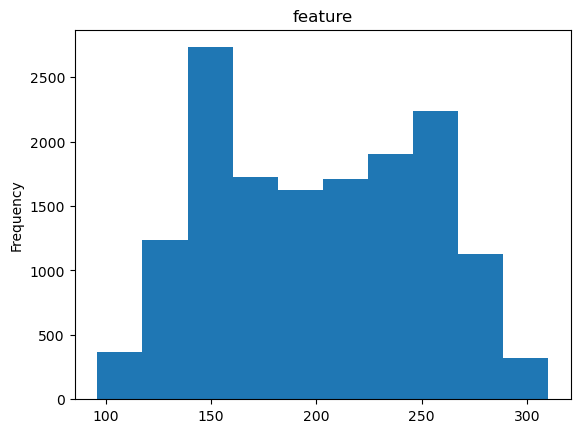

In [39]:

df['average_montly_hours'].plot(kind='hist', title='feature')


<AxesSubplot:title={'center':'feature'}, ylabel='Frequency'>

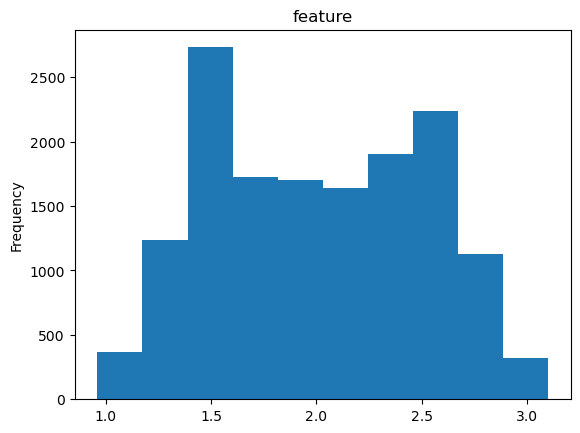

In [41]:
df['average_montly_hours_100'] = df['average_montly_hours']/100.0
df['average_montly_hours_100'].plot(kind='hist', title='feature')

In [51]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'average_montly_hours_100'],
      dtype='object')

In [171]:
####test
df_dummies_1 = pd.get_dummies(df, columns=['sales', 'salary'])
df_dummies_1.columns
x1=df_dummies_1[df_dummies.columns].values

In [142]:
x1.shape

(14999, 22)

In [172]:
df_dummies = pd.get_dummies(df[['sales', 'salary']])
df_dummies.columns
x1=df_dummies[df_dummies.columns].values

In [173]:
x1.shape

(14999, 13)

In [174]:
df.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [175]:
X = pd.concat([df[['satisfaction_level', 'last_evaluation', 'number_project',
                   'time_spend_company', 'Work_accident',
                   'promotion_last_5years', 'average_montly_hours_100']],
               df_dummies], axis=1).values
y = df['left'].values

In [176]:
df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [228]:
df_dummies.columns

Index(['sales_IT', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [229]:
X = pd.concat([df[['satisfaction_level', 'last_evaluation', 'number_project',
                   'time_spend_company', 'Work_accident',
                   'promotion_last_5years', 'average_montly_hours_100']],
               df_dummies], axis=1).values
y = df['left'].values

In [230]:
X

array([[0.38, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 0.  , 1.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 1.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 1.  , 0.  ]])

In [231]:
X.shape

(14999, 20)

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [233]:
len(X_train)

11999

In [234]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [235]:
model = Sequential()
model.add(Dense(1, input_dim=20, activation='sigmoid'))
model.compile(Adam(learning_rate=0.5), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=10)

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
375/375 [==============================] - 0s 626us/step - loss: 0.5359 - accuracy: 0.7611
Epoch 2/10
375/375 [==============================] - 0s 607us/step - loss: 0.5303 - accuracy: 0.7702
Epoch 3/10
375/375 [==============================] - 0s 638us/step - loss: 0.5788 - accuracy: 0.7591
Epoch 4/10
375/375 [==============================] - 0s 673us/step - loss: 0.5039 - accuracy: 0.7750
Epoch 5/10
375/375 [==============================] - 0s 618us/step - loss: 0.6173 - accuracy: 0.7584
Epoch 6/10
375/375 [==============================] - 0s 624us/step - loss: 0.5546 - accuracy: 0.7631
Epoch 7/10
375/375 [===================

In [236]:
#  accuracy


In [237]:
#### Test purpose
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


#y_class_pred= model.predict_classes(X)
#y_class_pred= model.predict(X)>0.5

y_class_pred= model.predict(X)>0.5

print("The accuracy score is {:0.3f}".format(f1_score(y, y_class_pred)))

#print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.493


In [238]:
from sklearn.metrics import confusion_matrix, classification_report

#confusion_matrix(y, y_class_pred)

#y_class_pred = model.predict(X)>0.5

y_test_pred = model.predict_classes(X_test)

def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

pretty_confusion_matrix(y_test, y_test_pred, labels=['Stay', 'Leave'])

#print(classification_report(y_test, y_test_pred))

#pretty_confusion_matrix(y, y_class_pred, labels=['Stay', 'Leave'])


E:\Anaconda3\envs\ztdl\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,Predicted Stay,Predicted Leave
Stay,1911,384
Leave,349,356


In [ ]:
print(classification_report(y, y_class_pred))

In [ ]:
# check if you still get the same results if you use a 5-Fold cross validation on all the data

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score

def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model



In [194]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=10, verbose=0)
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)


In [195]:


print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7721 ± 0.0118
